In [96]:
%matplotlib inline
from importlib import reload

In [97]:
import re, time, os.path as path
from datetime import date
from math import floor
from concurrent.futures import ThreadPoolExecutor, as_completed

from lib import my_types, count

start = time.perf_counter()

max_workers = 50
root_dir = "/home/bwhite/Projects/bryanchriswhite"
repo_names = [
#     "storj",
#     "uplink",
    "uplink-c"
]
excluded_exts = set()
repo_counts: my_types.AllRepoFileAuthors = {}

# TODO: use lib.util.filter_ext
def filter_ext(filename):
    ext = path.splitext(filename)[1]
    ext_whitelist = (
        ".go", ".proto", ".c", ".h", ".sh", ".md", ".xml", ".wixproj", ".wsx", ".cs"
    )
    exclude = filename == "" or ext not in ext_whitelist
    
    if exclude:
        excluded_exts.add(ext)
    
    return exclude

# end = time.perf_counter()
# print(str.format("done: {}s!", round(end - start, 2)))
# print(str.format("excluded file extensions: {}", excluded_exts))

In [98]:
from concurrent.futures import Future, as_completed, wait
from typing import List, Tuple, Dict

from lib import git, my_types, repo, worktree
from lib.repo import RepoStat
from lib.worktree import Worktree
from lib.my_types import FileAuthors
[reload(m) for m in (git, my_types, repo, worktree, count)]

# max_samples = 128
samples: List[Tuple[date, str]] = []
commits: Dict[str, date] = {}
    
repo_samples: Dict[str, List[Tuple[date, str]]] = {}
repo_commits: Dict[str, Dict[str, date]] = {}
    
author_regex = re.compile("\S+\s+\(([\w ]+)\s*?\d{4,}")
commit_re = re.compile("^(\w+)\s+\(.*,\s+(\d{4,}-\d{2,}-\d{2,})\)$")
    
repo_results = {}
for repo in repo_names:
    repo_root = "/home/bwhite/Projects/bryanchriswhite/uplink-c"
    rs = RepoStat(repo_root)
    repo_line_authors_history = rs.line_authors_range('master', file_filter=filter_ext, limit=10)
    results = []
    # TODO: repo_commit_*file*_authors ...
    for commit_date, repo_commit_line_authors in [f.result() for f in repo_line_authors_history]:
#         results.append((commit_date, [f.result() for f in repo_commit_line_authors.values() if f is not None]))
        for file, file_authors_f in repo_commit_line_authors.items():
                file_authors: FileAuthors = file_authors_f.result()
                if repo not in repo_counts:
                    repo_counts[repo]: Dict = {}
    #             repo_counts[repo][(commit_date, file_authors)]
                    #### TODO ----v: swap file and date; use timestamp!!!
                if commit_date not in repo_counts[repo]:
                    # TODO: THERE CAN BE MORE THAN ONE COMMIT PER DAY!!!
                    repo_counts[repo][commit_date] = {}
                repo_counts[repo][commit_date][file] = file_authors

        rcla = repo_commit_line_authors
        new_results = {file:fut.result() for (file, fut) in rcla.items() if fut is not None}
        results.append((commit_date, new_results))
    repo_results[repo] = results


len(commits) 10


In [99]:
# print(repo_counts)
# print([k for k in repo_counts['uplink-c'].values()][18])
print(len(repo_results['uplink-c']))
print(repo_results)

10
{'uplink-c': [(datetime.datetime(2020, 4, 6, 15, 56, 47, tzinfo=tzoffset(None, 10800)), {'MAINTAINERS.md': {'Kaloyan Raev': 38}, 'README.md': {'Egon Elbre': 2, 'Kaloyan Raev': 39}, 'access.go': {'Egon Elbre': 159, 'Michal Niewrzal': 15}, 'bucket.go': {'Egon Elbre': 165}, 'buckets.go': {'Egon Elbre': 118}, 'config.go': {'Egon Elbre': 81, 'Michal Niewrzal': 5}, 'custommetadata.go': {'Egon Elbre': 108}, 'custommetadata_test.go': {'Egon Elbre': 49}, 'download.go': {'Egon Elbre': 160, 'Michal Niewrzal': 3}, 'error.go': {'Egon Elbre': 84, 'Michal Niewrzal': 1}, 'handles.go': {'Egon Elbre': 67}, 'handles_test.go': {'Egon Elbre': 39}, 'main.go': {'Egon Elbre': 17}, 'object.go': {'Egon Elbre': 127, 'Michal Niewrzal': 3}, 'objects.go': {'Egon Elbre': 129}, 'project.go': {'Egon Elbre': 90, 'Michal Niewrzal': 1}, 'scope.go': {'Egon Elbre': 34}, 'testsuite/testdata/access_test.c': {'Egon Elbre': 34, 'Michal Niewrzal': 127}, 'testsuite/testdata/bucket_test.c': {'Egon Elbre': 110}, 'testsuite/test

In [100]:
from lib import report, util
[reload(m) for m in (report, util)]

totals_dict = util.sum_repo_commit_lines(repo_results)
# totals_dict = util.repo_counts_to_totals_dict(repo_counts)
# # report.leaderboard(totals_dict)
totals_dict


len(commit_file_authors 10
(datetime.datetime(2020, 4, 6, 15, 56, 47, tzinfo=tzoffset(None, 10800)), {'MAINTAINERS.md': {'Kaloyan Raev': 38}, 'README.md': {'Egon Elbre': 2, 'Kaloyan Raev': 39}, 'access.go': {'Egon Elbre': 159, 'Michal Niewrzal': 15}, 'bucket.go': {'Egon Elbre': 165}, 'buckets.go': {'Egon Elbre': 118}, 'config.go': {'Egon Elbre': 81, 'Michal Niewrzal': 5}, 'custommetadata.go': {'Egon Elbre': 108}, 'custommetadata_test.go': {'Egon Elbre': 49}, 'download.go': {'Egon Elbre': 160, 'Michal Niewrzal': 3}, 'error.go': {'Egon Elbre': 84, 'Michal Niewrzal': 1}, 'handles.go': {'Egon Elbre': 67}, 'handles_test.go': {'Egon Elbre': 39}, 'main.go': {'Egon Elbre': 17}, 'object.go': {'Egon Elbre': 127, 'Michal Niewrzal': 3}, 'objects.go': {'Egon Elbre': 129}, 'project.go': {'Egon Elbre': 90, 'Michal Niewrzal': 1}, 'scope.go': {'Egon Elbre': 34}, 'testsuite/testdata/access_test.c': {'Egon Elbre': 34, 'Michal Niewrzal': 127}, 'testsuite/testdata/bucket_test.c': {'Egon Elbre': 110}, 'test

{'uplink-c': [(datetime.datetime(2020, 4, 6, 15, 56, 47, tzinfo=tzoffset(None, 10800)),
   {'Kaloyan Raev': 77, 'Egon Elbre': 2593, 'Michal Niewrzal': 376}),
  (datetime.datetime(2020, 3, 31, 16, 8, 33, tzinfo=tzoffset(None, 10800)),
   {'Egon Elbre': 2593, 'Kaloyan Raev': 39, 'Michal Niewrzal': 376}),
  (datetime.datetime(2020, 3, 19, 18, 5, 25, tzinfo=tzoffset(None, 3600)),
   {'Egon Elbre': 2593, 'Kaloyan Raev': 39, 'Michal Niewrzal': 376}),
  (datetime.datetime(2020, 3, 16, 19, 36, 27, tzinfo=tzoffset(None, 3600)),
   {'Egon Elbre': 2593, 'Kaloyan Raev': 39, 'Michal Niewrzal': 376}),
  (datetime.datetime(2020, 3, 13, 14, 8, 7, tzinfo=tzoffset(None, 7200)),
   {'Egon Elbre': 2604, 'Kaloyan Raev': 39, 'Michal Niewrzal': 366}),
  (datetime.datetime(2020, 3, 12, 17, 13, 56, tzinfo=tzoffset(None, 7200)),
   {'Egon Elbre': 2604, 'Kaloyan Raev': 39, 'Michal Niewrzal': 366}),
  (datetime.datetime(2020, 3, 12, 17, 23, 10, tzinfo=tzoffset(None, 7200)),
   {'Egon Elbre': 2604, 'Kaloyan Raev':

len commit dates & ys: [10, 10, 10, 10]
[77, 39, 39, 39, 39, 39, 39, 0, 0, 0]

[2593, 2593, 2593, 2593, 2604, 2604, 2604, 2605, 2607, 2614]

[376, 376, 376, 376, 366, 366, 366, 366, 364, 359]



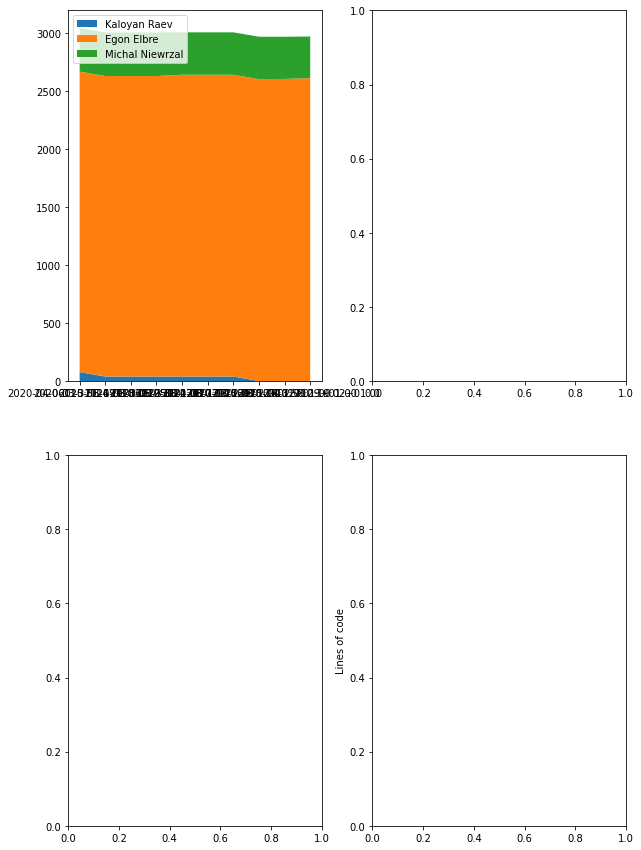

In [101]:
from lib import graph
reload(graph)

graph.repo_stackplots(totals_dict)
# graph.repo_stackplots(repo_results)

In [102]:
# from github import Github
#
# apikey = open("github.apikey")
#
# g = Github()
# org = g.get_organization("storj")
# repos = org.get_repos()
# page = repos.get_page(0)
#
# storj_repos = page

In [103]:
# [(r.name, r.created_at) for r in storj_repos]